<a href="https://colab.research.google.com/github/Fiona201220/Money-for-shopping-Project/blob/main/Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project **

Authors: Eric De Leon , Xiaofei Wang

Date: 2024.10.17

subject:


# 1.Data Preprocessing
## Data loading
You can find data on Github:https://github.com/Fiona201220/Money-for-shopping-Project



In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from google.colab import drive
#  Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/project_data.csv'
df = pd.read_csv(file_path)
#df = pd.read_csv("C:\Users\deleo\Documents\R\BERN02 R\project_statistics_data.csv");
income = df["Annual Income"]
print(df.head())

Mounted at /content/drive
   ID  Gender  Age  Annual Income  Normalized spending
0   1    Male   19            NaN                 0.39
1   2    Male   21        15195.0                 0.81
2   3  Female   20        15195.0                 0.06
3   4  Female   23        16208.0                 0.77
4   5  Female   31        16208.0                 0.40


## Data Exploration

*   Examine the structure and content of the dataset.



In [ ]:
# 1. the structure and content of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 1 to 199
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   199 non-null    int64   
 1   Gender               199 non-null    object  
 2   Age                  199 non-null    int64   
 3   Annual Income        199 non-null    float64 
 4   Normalized spending  199 non-null    float64 
 5   Income Category      199 non-null    object  
 6   Age Group            195 non-null    category
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 11.3+ KB
None


*   Check for missing values, data types, and potential outliers.

In [ ]:
# 2. Check for missing values
print(df.isnull().sum())
# 3. data types
print(df.dtypes)

ID                     0
Gender                 0
Age                    0
Annual Income          1
Normalized spending    0
dtype: int64
ID                       int64
Gender                  object
Age                      int64
Annual Income          float64
Normalized spending    float64
dtype: object


## Descriptive Statistics

In [ ]:
print(df.describe())

               ID         Age  Annual Income  Normalized spending
count  200.000000  200.000000     199.000000           200.000000
mean   100.500000   38.850000   60958.165829             0.502000
std     57.879185   13.969007   26096.516427             0.258235
min      1.000000   18.000000   15195.000000             0.010000
25%     50.750000   28.750000   41533.000000             0.347500
50%    100.500000   36.000000   61793.000000             0.500000
75%    150.250000   49.000000   79014.000000             0.730000
max    200.000000   70.000000  138781.000000             0.990000


We get a brief introduction of the data, which contains 199 samples with their Age, Gender, Annual Income, and Normlized spending.

We want to classify people into several groups by these characters. These can be used in several analyses in daily life. For example, in market segmentation, businesses can categorize consumers into different groups to tailor marketing strategies, offers, and products according to purchasing power and spending behavior.

Besides, financial institutions can use income and spending data to assess the creditworthiness of individuals, helping them decide on loan approvals and credit limits.


## Data Visualization


*   ### Scatter plots

Firstly, we draw the scatter plot to roughly see if Gender has a relationship with Annual Income and Normalized spending



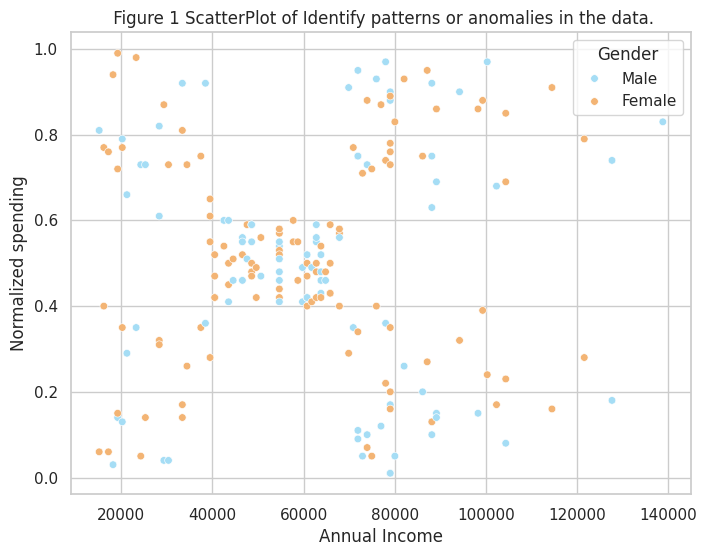

In [ ]:
# scatterplot with different gender
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income', y='Normalized spending', hue='Gender', data=df, palette={'Male': "#A5DDF5", 'Female': "#F3B474"}, s=30)

plt.xlabel('Annual Income')
plt.ylabel('Normalized spending')
plt.title(' Figure 1 ScatterPlot of Identify patterns or anomalies in the data.')
plt.show()

From Figure 1, it seems that gender is not strongly correlated with Income and Spending.

*   ### Box plots

Then we make the Box plot. We divide the Annual Income into 3 categories, if Income < 40000, it belongs to 'low'; if Income



In [ ]:
# define income category
def categorize_income(income):
    if pd.isna(income):
        return 'low'
    elif income < 40000:
        return 'low'
    elif 40000 <= income <= 80000:
        return 'middle'
    else:
        return 'high'

df['Income Category'] = df['Annual Income'].apply(categorize_income)
print(df)

      ID  Gender  Age  Annual Income  Normalized spending Income Category
0      1    Male   19            NaN                 0.39             low
1      2    Male   21        15195.0                 0.81             low
2      3  Female   20        15195.0                 0.06             low
3      4  Female   23        16208.0                 0.77             low
4      5  Female   31        16208.0                 0.40             low
..   ...     ...  ...            ...                  ...             ...
195  196  Female   35       121560.0                 0.79            high
196  197  Female   45       121560.0                 0.28            high
197  198    Male   32       127638.0                 0.74            high
198  199    Male   32       127638.0                 0.18            high
199  200    Male   30       138781.0                 0.83            high

[200 rows x 6 columns]


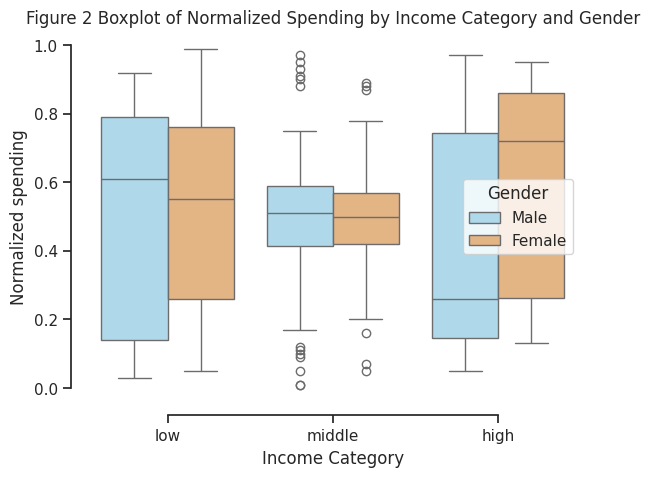

In [ ]:
#box polt
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Income Category", y="Normalized spending",
            hue="Gender", palette=["#A5DDF5", "#F3B474"],
            data=df)
plt.title("Figure 2 Boxplot of Normalized Spending by Income Category and Gender")
sns.despine(offset=10, trim=True)

From Figure 2, we can see :

In the low- and high-income categories, both males and females exhibit a wider spread of normalized spending, with a noticeable range between the lower and upper quartiles.
In the middle income category, the spread is narrower for both genders, indicating less **variation** in spending.

There are **outliers** present, particularly in the middle income category for both males and females, showing that a few individuals spend significantly outside the normal range.

There seems to be no clear difference between Males and Females considering these two factors.



*  ###  Histograms
We make the histograms to see if Age has an influence on the performance for people's Spending and Income. Divide age into 5 groups




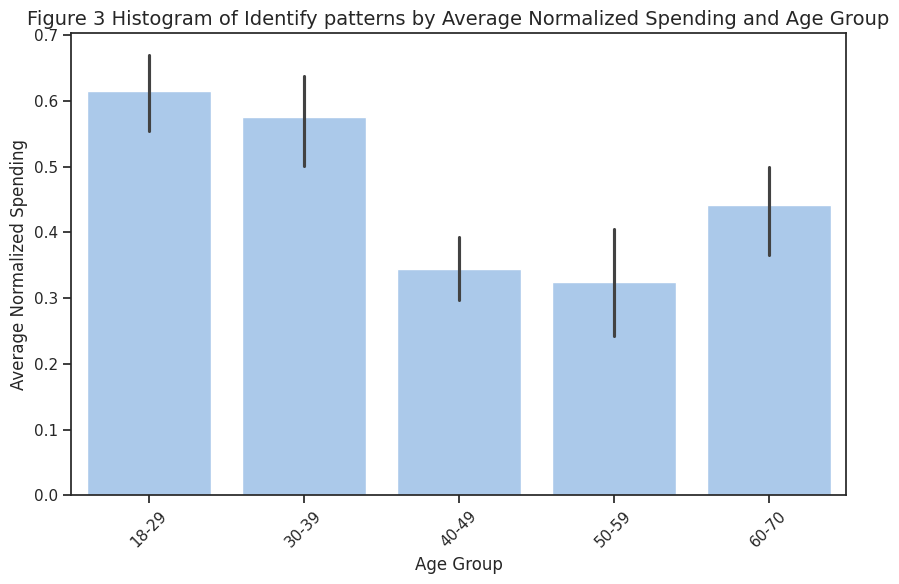

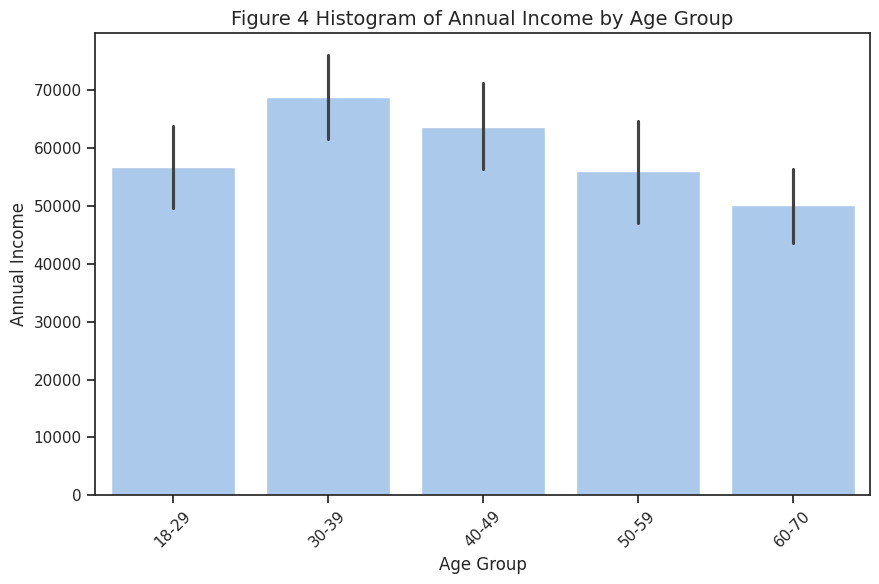

In [ ]:
# Handle missing values: delete rows that contain NaN.
df = df.dropna(subset=['Annual Income'])

#
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-70']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Normalized spending', data=df)

plt.title('Figure 3 Histogram of Identify patterns by Average Normalized Spending and Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Normalized Spending', fontsize=12)
plt.xticks(rotation=45)
plt.show()



plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Annual Income', data=df)

plt.title('Figure 4 Histogram of Annual Income by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Annual Income', fontsize=12)
plt.xticks(rotation=45)
plt.show()

From Figure 3, the highest average normalized spending is observed in the 18-29 age group, followed by the 30-39 and 60-70 age groups.
The 40-49 and 50-59 age groups show noticeably lower average normalized spending compared to the other groups.

The error bars represent the variability of normalized spending within each age group. The 18-29 and 30-39 age groups have larger error bars, suggesting greater variability in spending within these groups.
The 40-49 age group has the smallest error bars, indicating more consistent spending behavior in this group.

Spending Patterns:There seems to be a decline in average spending after the 30-39 age group, with a slight recovery in spending in the 60-70 age group.
This could suggest that younger and older individuals spend more in relative terms compared to middle-aged groups.

From Figure 4, we can see there is no big difference in Income between the Age groups.

After the data visualization, we can see that Gender and Age don't show a big difference when we try to cluster people with the characters Annual Income and Normalized Spending. So we will give up these two factors for next steps.

# 2.Unsupervised Learning – Clustering
## Feature Selection
For clustering, we select Annual Income and Normalized Spending as the fetures X.
## Data Scaling
Use `StandardScaler` to rescale X

In [ ]:
# Delete the NaN data
df = df.dropna(subset=['Annual Income'])
X = df[['Annual Income', 'Normalized spending']]

# Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Determining Optimal Clusters

Use the **elbow method** to find the optimal number k of clusters.

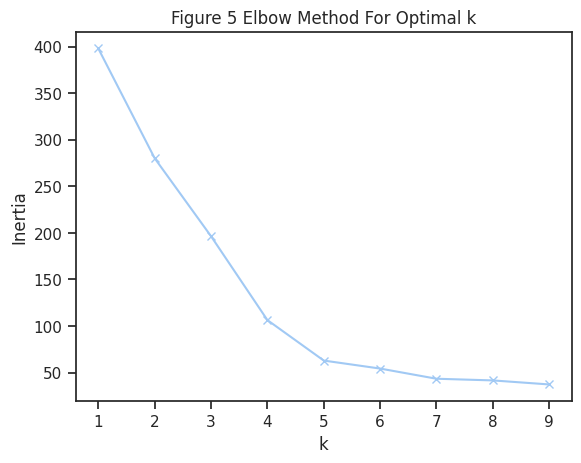

In [ ]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# plot different k
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Figure 5 Elbow Method For Optimal k')
plt.show()

We choose k = 5 to do the clusters.
## Clustering Algorithm
Implement **K-Means** clustering.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)



## Cluster Visualization

*   ### Scatter plots




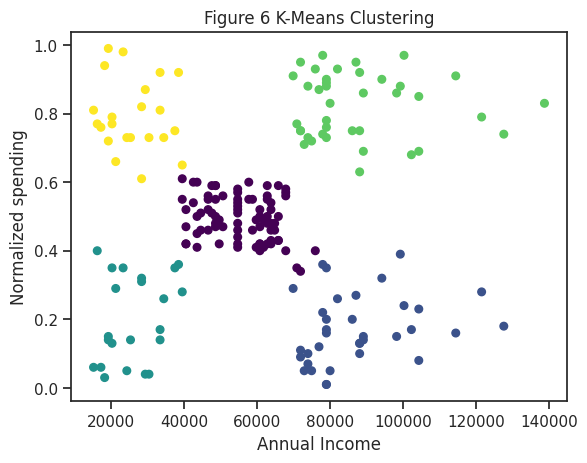

In [ ]:

plt.scatter(df['Annual Income'], df['Normalized spending'], c=df['Cluster'], cmap='viridis', s=30)
plt.xlabel('Annual Income')
plt.ylabel('Normalized spending')
plt.title('Figure 6 K-Means Clustering')
plt.show()

*   ### Pair plots




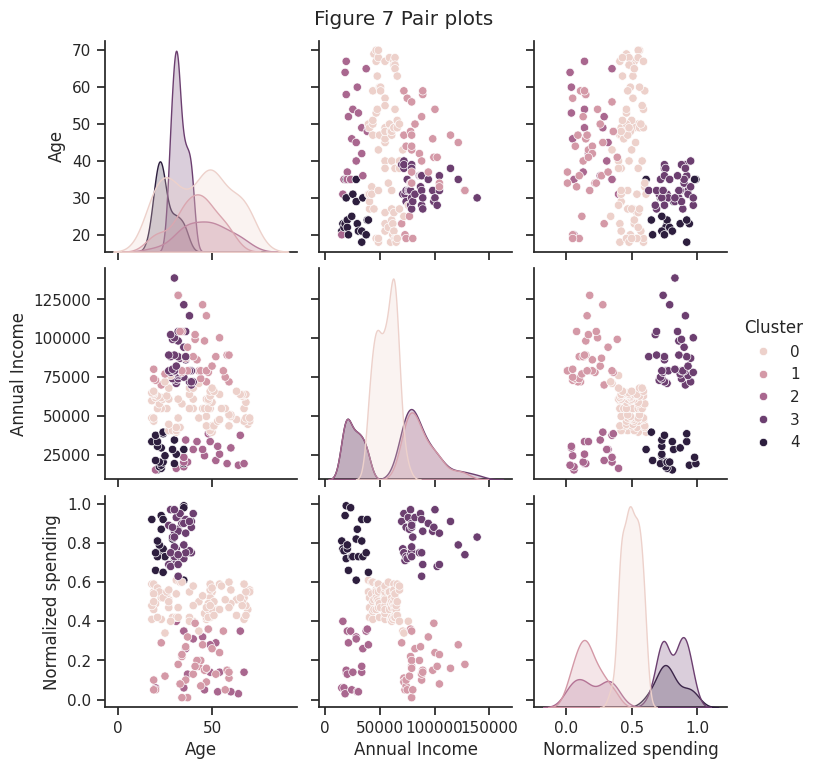

In [ ]:
pair_plot = sns.pairplot(df[["Age", "Annual Income", "Normalized spending", "Cluster"]], hue="Cluster")

# Set a title for the figure
pair_plot.fig.suptitle('Figure 7 Pair plots', y=1.02)  # Adjust y for spacing

# Show the plot
plt.show()

The clusters indicate distinct customer segments based on income and spending behavior. High-income individuals tend to spend more, but there are differences in how consistently they spend across clusters.
Age appears to be less influential in determining spending and income patterns compared to the other two variables.
The clear separation in spending habits and income levels can help guide marketing strategies, customer segmentation, and tailored offers for each group.

## Cluster Interpretation
Give the labels to each cluster considering their characteristics :


In [ ]:
cluster_names = {
    0: 'Middle Income, Middle Spending',
    1: 'High Income, Low Spending',
    2: 'Low Income, Low Spending',
    3: 'High Income, High Spending',
    4: 'Low Income, High Spending'
}

df['Cluster Name'] = df['Cluster'].map(cluster_names)
print(df[['ID','Annual Income', 'Normalized spending', 'Cluster Name']])

      ID  Annual Income  Normalized spending                Cluster Name
1      2        15195.0                 0.81   Low Income, High Spending
2      3        15195.0                 0.06    Low Income, Low Spending
3      4        16208.0                 0.77   Low Income, High Spending
4      5        16208.0                 0.40    Low Income, Low Spending
5      6        17221.0                 0.76   Low Income, High Spending
..   ...            ...                  ...                         ...
195  196       121560.0                 0.79  High Income, High Spending
196  197       121560.0                 0.28   High Income, Low Spending
197  198       127638.0                 0.74  High Income, High Spending
198  199       127638.0                 0.18   High Income, Low Spending
199  200       138781.0                 0.83  High Income, High Spending

[199 rows x 4 columns]


# 3. Supervised Learning – Classification

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Features and labels
X = X_scaled  # Use the scaled features
y = df['Cluster']  # Labels are the cluster assignments

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

The labels used in this section are the five found in the previous sections which are:
*   High Income, High Spending
*   Low Income, High Spending
*   High Income, Low Spending
*   Middle Income, Middle Spending
*   Low Income, Low Spending

Then we use X_scaled, also found in the previous section. Using the function train_test_split, we manage to divide our data into train and test data.



## Model Training and Performance Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize classifiers
dt_model = DecisionTreeClassifier(random_state=0)
rf_model = RandomForestClassifier(random_state=0)

# Train models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Decision Tree Performance:
Accuracy: 0.9166666666666666
Precision: 0.925
Recall: 0.9166666666666666
F1 Score: 0.91765873015873
Confusion Matrix:
 [[20  1  0  0  0]
 [ 1 10  0  0  0]
 [ 0  0  4  0  0]
 [ 2  0  0 11  0]
 [ 1  0  0  0 10]]

Random Forest Performance:
Accuracy: 0.95
Precision: 0.9529040404040404
Recall: 0.95
F1 Score: 0.9492770475227502
Confusion Matrix:
 [[20  1  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 13  0]
 [ 2  0  0  0  9]]


Both models do a good job at predicting as all their results are above 0.9. The confusion matrices show there are very few elements that were predicted incorrectly (in the decision tree model there were five misclassified elements and in the Random Forest model there were three misclassifications). As shown in the results, the Random Forest Model does a better job at predicting than the Decision Tree Model; therefore we can conclude the strength of the Random Forest is that is better at predicting since it is less prone to overfit. However, its weakness compared to Decision Tree is that it requires more computation and it will take more time to implement.

In [ ]:
results_df = pd.DataFrame({
    'True Label': y_test,
    'Decision Tree Prediction': y_pred_dt,
    'Random Forest Prediction': y_pred_rf
})

# Display the DataFrame to see a comparison of true labels and predictions
results_df.reset_index(drop=True, inplace=True)  # Reset index for clarity
print(results_df.head())

   True Label  Decision Tree Prediction  Random Forest Prediction
0           4                         4                         4
1           1                         1                         1
2           0                         0                         0
3           0                         0                         0
4           3                         3                         3


In [ ]:
unique_clusters = df[["Cluster", "Cluster Name"]].drop_duplicates()

print(unique_clusters)

     Cluster                    Cluster Name
1          4       Low Income, High Spending
2          2        Low Income, Low Spending
43         0  Middle Income, Middle Spending
123        3      High Income, High Spending
124        1       High Income, Low Spending


The data frame shown above summarizes the results of the predictions of the models compared to the true label. The Cluster numbers correspond to the following names:


    0: 'Middle Income, Middle Spending',
    1: 'High Income, Low Spending',
    2: 'Low Income, Low Spending',
    3: 'High Income, High Spending',
    4: 'Low Income, High Spending'





# 4. Neural Network Implementation


## Data Preparation

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
num_classes = 5;

# Assuming X_train and X_test contain feature data, y_train and y_test contain labels
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert labels to one-hot encoding  (for multi-class classification)
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

For this section we used the train and test data used in the previous section. We first scaled the data and then we converted the labels to one-hot encoding.

## Model Building and Training

In [ ]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')  # Adjust num_classes accordingly
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,437 (9.52 KB)

 Trainable params: 2,437 (9.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
batch_size = 50
epochs = 50

model_train = model.fit(X_train_scaled, y_train_categorical,
                        batch_size=batch_size,epochs=epochs,
                        verbose=1, validation_data=(X_test_scaled, y_test_categorical))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.0793 - loss: 1.6798 - val_accuracy: 0.0333 - val_loss: 1.6530
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1516 - loss: 1.6295 - val_accuracy: 0.2167 - val_loss: 1.5975
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2065 - loss: 1.5894 - val_accuracy: 0.3000 - val_loss: 1.5432
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3596 - loss: 1.5203 - val_accuracy: 0.5167 - val_loss: 1.4917
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4233 - loss: 1.4710 - val_accuracy: 0.5667 - val_loss: 1.4419
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4721 - loss: 1.4358 - val_accuracy: 0.5833 - val_loss: 1.3960
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5262 - loss: 1.4143 - val_accuracy: 0.7000 - val_loss: 1.3526
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5736 - loss: 1.3709 - val_accuracy: 0.7333 - val_loss: 1.3107

In this section is where the **Neural Network Model** is built and trained. We used 50 epochs to train the model and the results are shown in the plots below.

## Performance Evaluation

Test loss: 0.30519211292266846
Test accuracy: 0.9333333373069763


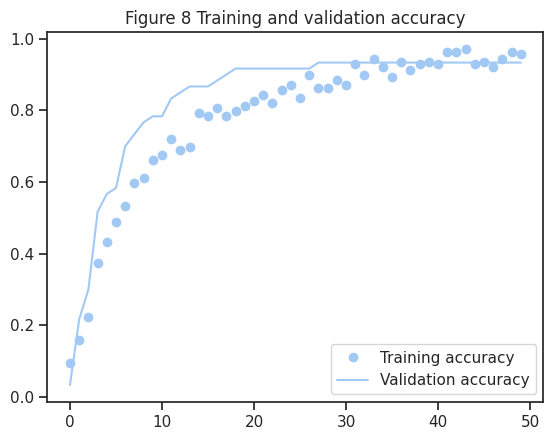

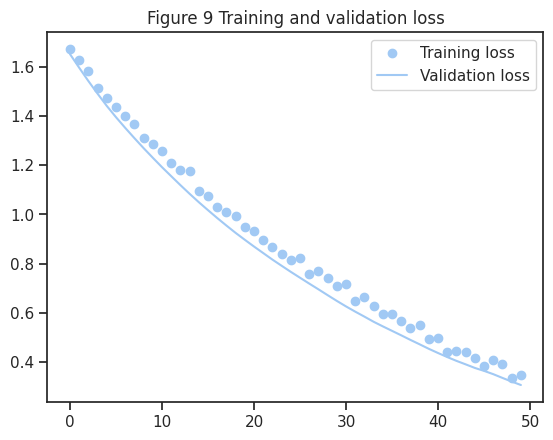

In [ ]:
test_eval = model.evaluate(X_test_scaled, y_test_categorical, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Figure 8 Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Figure 9 Training and validation loss')
plt.legend()
plt.show()

The plots shows the accuracy is improving in every epoch in both, the train and test data. It is also seen the validation loss is smaller in every epoch.

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to class labels
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Display results
print("Neural Network Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Neural Network Performance:
Accuracy: 0.9333333333333333
Precision: 0.9390700483091786
Recall: 0.9333333333333333
F1 Score: 0.9312634352680119
Confusion Matrix:
 [[20  1  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 13  0]
 [ 3  0  0  0  8]]


# Conclusion

The results of the Neural Network model are lower than that of the Random Forest. It is better than the Decision Tree model as it has higher accuracy, precision, recall, and F1 score. Also, the Confusion Matrix shows it as a less misclassified label.
Improvements of a neural network are it handles overfitting better and it can create a good model with complex data. Discrepancies are it requires a lot of computation and tuning (e.g. epochs, batch size, etc.) which makes it more complicated than a Random Forest or a Decision Tree.
FAIR principles relate to this in that it is *Findable*. We put the data on Google Drive, a widely available platform. It is *Accesible*  because the notebook was created in Colab and is stored in a Google Drive, whoever has access to it can use it. It is *Interoperable* because the data is in a CSV and it uses Python libraries like pandas. It is *Reusable* because each section includes the different steps we used to get our findings.